<br><br><br>
<center> <h3 style="color:blue">========================================================</h3> </center>
<center> <h3 style="color:green">In the Name of Allah, the Most Beneficent, the Most Merciful</h3> </center>
<center> <h3 style="color:blue">========================================================</h3> </center>
<br><br><br>

        *------------------------------------------- AUTHOR_DETAILS -------------------------------------------------------*
        |                                                                                                                  |
        |        Project Title  = Developing a Pneumonia Disease Prediction System (from X-ray Images)                     |           |                         using CNN-based Deep Neural Networks                                                     |           |                                                                                                                  |
        |                                                                                                                  |
        |        Author         = Ms. Fatima Zulfiqar                                                                      |
        |                                                                                                                  |
        |        Copyright      = Copyright (C) 2020 Ms. Fatima Zulfiqar                                                   |
        |                                                                                                                  |
        |        License        = Public Domain                                                                            |
        |                                                                                                                  |
        |        Version        = 1.0                                                                                      |
        |                                                                                                                  |
        *------------------------------------------------------------------------------------------------------------------*

<br><br><br>
<center> <h2 style="color:green">-------------------- PROJECT PURPOSE --------------------</h2> </center>
<br>
<center><h3>
The main purpose of this Project is to demonstrate CNN-based Deep Neural Network can be used for the development and evaluation of Pneumonia Disease Prediction System (from X-ray Images). </h3>
<br>
<center><h3> For this purpose, In sha Allah, I will treat Pneumonia Disease Prediction Problem as a Binary Classificaiton Problem i.e. the main goal is to discriminate between two Classses: (1) Normal and (2) Pneumonia and evaluation of Pneumonia Classification from an Image. </h3>
<br>



<center><h3> For this purpose, Insha Allah, I will execute the Machine Learning Cycle </h3>
<center> <h2 style="color:green">-------------------------------------------------------------------------</h2> </center>
<br><br><br>

# <center>**Pneumonia Disease Prediction System- Machine Learning Cycle**</center> 




# **Machine Learning Cycle**
## **Four phases of a Machine Learning Cycle are**
### **Training Phase**
  * **Build the Model using Training Data**

### **Testing Phase**
  * **Evaluate the performance of Model using Testing Data**

### **Application Phase**
  * **Deploy the Model in Real-world , to make prediction on Real-time unseen Data**
  
### **Feedback Phase**
  * **Take Feedback form the Users and Domain Experts to improve the Model**

# **Steps – Executing Machine Learning Cycle**

## **Step 01: Import Libraries**
## **Step 02: Load Training Data, Testing Data and Validation Data**
### ***Step 2.1: Load Training Data***
### ***Step 2.2: Load Testing Data***
### ***Step 2.3: Load Validation Data***
## **Step 03: Understand and Pre-process Training Data, Testing Data and Validation Data**
### ***Step 3.1: Understand Training Data*** 
### ***Step 3.2: Understand Testing Data***
### ***Step 3.3: Understand Validation Data***
### ***Step 3.4: Pre-process Training Data***
#### *Step 3.4.1: Resize X-ray Images in Training Data*
#### *Step 3.4.2: Convert Resized X-ray Images in Training Data into Grayscale*

### ***Step 3.5: Pre-process Testing Data***
#### *Step 3.5.1: Resize X-ray Images in Testing Data*
#### *Step 3.5.2: Convert Resized X-ray Images in Testing Data into Grayscale*

### ***Step 3.6: Pre-process Validation Data***
#### *Step 3.6.1: Resize X-ray Images in Validation Data*
#### *Step 3.6.2: Convert Resized X-ray Images in Validation Data into Grayscale*

## **Step 04: Represent Training Data, Testing Data and Validation Data in Machine Understandable Format**

### ***Step 4.1: Represent Training Data into Machine Understandable Format***
#### *Step 4.1.1: Convert Resized Grayscale X-ray Images in Training Data into Numpy Array*
#### *Step 4.1.2: Nomalize Numpy Array of Grayscale X-ray Images in Training Data*

### ***Step 4.2: Represent Testing Data into Machine Understandable Format***
#### *Step 4.2.1: Convert Resized Grayscale X-ray Images in Testing Data into Numpy Array*
#### *Step 4.2.2: Nomalize Numpy Array of Grayscale X-ray Images in Testing Data*

### ***Step 4.3: Represent Validation Data into Machine Understandable Format***
#### *Step 4.3.1: Convert Resized Grayscale X-ray Images in Validation Data into Numpy Array*
#### *Step 4.3.1: Nomalize Numpy Array of Grayscale X-ray Images in Validation Data*

## **Step 05: Execute the Training Phase**
### ***Step 5.1: Create CNN Model Architecture***
### ***Step 5.2: Hyperparameters Settings***
### ***Step 5.3: Create CNN Model Object***
### ***Step 5.4: Initialize Optimizer and Loss Function***
### ***Step 5.5: Evaluation Measure***
### ***Step 5.6: Calculate Epoch Elapsed Time***
### ***Step 5.7: Train Model***
### ***Step 5.8: Save Model***
 

## **Step 06: Execute the Testing Phase**
### ***Step 6.1: Load Saved Model (Saved in Step 5.8)***
### ***Step 6.2: Make Predictions on Testing Data***
### ***Step 6.3: Evaluate Performance of Trained Model on Test Data***
#### *Step 6.3.1: Calculate Accuracy*
#### *Step 6.3.2: Draw Confusion Matrix*
#### *Step 6.3.3: Print Classification Report*

## **Step 07: Execute the Application Phase**
### ***Step 7.1: Take Input (X-ray Image) from User***
### ***Step 7.2: Convert User Input (X-ray Image) into Feature Vector (Exactly Same as Feature Vectors of Training Data, Testing Data and Validation Data)***
### ***Step 7.3: Make Prediction on Unseen Data***  
#### *Step 7.3.1: Load the Model (Saved in Step 5.8)*
#### *Step 7.3.2: Apply Model on Feature Vector of Unseen Data*
#### *Step 7.3.3: Return Prediction to the User*

## **Step 08: Execute the Feedback Phase**
## **Step 09: Improve Model Based on Feedback**


# **Step 1: Import Libraries**


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import keras
import pandas as pd
import numpy as np
from keras.models import Model, Sequential,load_model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop,SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import cv2
import os
import itertools

In [2]:
# Mount Your Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 02: Load Training Data, Testing Data and Validation Data**
## **Step 2.1: Load Training Data**


In [3]:
''' 
    /*----------------------------- LOAD_DATASET ----------------
    | Function  : load_dataset()
    | Purpose   : Reads Dataset(X-ray Images) in .jpeg file format 
    | Arguments : 
    |       dataset_dir : Path to dataset file
    |       
    | Return    :
    |       dataset    : Dataset in dataframe format
    *------------------------------------------------------------*/
'''

labels = ['normal', 'pneumonia']
def load_dataset(dataset_dir):
  dataset = []
  for label in labels: 
    path = os.path.join(dataset_dir, label)
    classes = labels.index(label)
    for data in os.listdir(path):
      try:
        image_array = cv2.imread(os.path.join(path, data))
        dataset.append([image_array, classes])
      except Exception as e:
        print(e)
  return dataset    

In [4]:
training_data = load_dataset('/content/drive/MyDrive/Binary Class Pneumonia Classification/Sample Data/Training_Data')


## **Step 2.2: Load Testing Data** 

In [5]:
testing_data = load_dataset('/content/drive/MyDrive/Binary Class Pneumonia Classification/Sample Data/Testing_Data')


## **Step 2.3: Load Validation Data** 

In [6]:
validation_data = load_dataset('/content/drive/MyDrive/Binary Class Pneumonia Classification/Sample Data/Validation_Data')


# **Step 3: Understand and Pre-process Training Data, Testing Data and Validation Data**


## **Step 3.1: Understand Training Data**


In [7]:
normal=0
pneumonia = 0
print("Main Characteristics of Training Data")
print ("=====================================\n")
print("Total Instances (X-ray Images)                 = ",len(training_data))
for images in training_data:
    if(images[1] == 0):
      normal = normal+1
    else:
      pneumonia = pneumonia+1
print("Total Instances (X-ray Images) With Disease    = ",pneumonia)
print("Total Instances (X-ray Images) Without Disease = ",normal)


Main Characteristics of Training Data

Total Instances (X-ray Images)                 =  72
Total Instances (X-ray Images) With Disease    =  36
Total Instances (X-ray Images) Without Disease =  36


## **Step 3.2: Understand Testing Data**


In [8]:
normal=0
pneumonia = 0
print("Main Characteristics of Testing Data")
print ("===================================\n")
print("Total Instances (X-ray Images)                 = ",len(testing_data))
for images in testing_data:
    if(images[1] == 0):
      normal = normal+1
    else:
      pneumonia = pneumonia+1
print("Total Instances (X-ray Images) With Disease    = ",pneumonia)
print("Total Instances (X-ray Images) Without Disease = ",normal)


Main Characteristics of Testing Data

Total Instances (X-ray Images)                 =  20
Total Instances (X-ray Images) With Disease    =  10
Total Instances (X-ray Images) Without Disease =  10


## **Step 3.3: Understand Validation Data**


In [9]:
normal=0
pneumonia = 0
print("Main Characteristics of Validation Data")
print ("=======================================\n")
print("Total Instances (X-ray Images)                 = ",len(validation_data))
for images in validation_data:
    if(images[1] == 0):
      normal = normal+1
    else:
      pneumonia = pneumonia+1
print("Total Instances (X-ray Images) With Disease    = ",pneumonia)
print("Total Instances (X-ray Images) Without Disease = ",normal)


Main Characteristics of Validation Data

Total Instances (X-ray Images)                 =  8
Total Instances (X-ray Images) With Disease    =  4
Total Instances (X-ray Images) Without Disease =  4


## **Step 3.4: Pre-process Training Data**
### **Step 3.4.1 Resize X-ray Images in Training Data**


In [10]:
''' 
    /*----------------------------- DISPLAY_IMAGE ----------------
    | Function  : display_image()
    | Purpose   : To Display X-Ray Images 
    | Arguments : 
    |       original_image : Path to dataset file
    |       
    | Return    :
    |       dataset    : Dataset in dataframe format
    *------------------------------------------------------------*/
'''

def display_image(original_image, preprocessed_image, title1 , title2 ):
  plt.figure(figsize=(10,10))
  
  plt.subplot(1,2,1)
  plt.imshow(original_image[0][0], cmap='gray')
  plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
  plt.title(title1)
  
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,2)
  plt.imshow(preprocessed_image[0][0], cmap='gray')
  plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
  plt.title(title2)

In [11]:
''' 
    /*----------------------------- DATA_RESIZING -------------------------
    | Function  : resize()
    |
    | Purpose   : Resize Resolution of Original Image into Desired Resolution:           
    | Arguments : 
    |      original_image: Original Image to be Resized
    | Return    :
    |       resized_image: Resized Image 
    *---------------------------------------------------------------=-----*/
'''
def resize(dataset_dir,width,height):
  image_dimension=(width,height)
  labels = ['normal', 'pneumonia']
  resized_image = []
  for label in labels: 
        path = os.path.join(dataset_dir, label)
        classes = labels.index(label)
        for image in os.listdir(path):
          original_image = cv2.imread(os.path.join(path, image))
          resized_array = cv2.resize(original_image, image_dimension) # Reshaping images to preferred size
          resized_image.append([resized_array, classes])
  
  return np.array(resized_image) # Convert Image into numpy array form
  

In [12]:
image_width = 224
image_height = 224
resized_training_data = resize('/content/drive/MyDrive/Binary Class Pneumonia Classification/Sample Data/Training_Data',image_width,image_height)

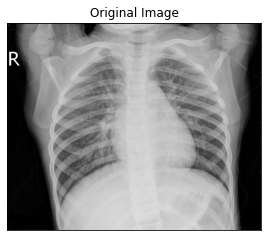

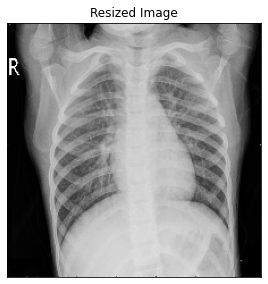

In [13]:
display_image(training_data,resized_training_data,'Original Image',"Resized Image")

###	**Step 3.4.2: Convert Resized X-ray Images in Training Data into Grayscale**

In [14]:
''' 
    /*----------------------------- RGB to GRAY -------------------------
    | Function  : to_grayscale()
    |
    | Purpose   : Convert Images in RGB into Grayscale Images           
    | Arguments : 
    |      resized_image: Resized Image
    | Return    :
    |       grayscale_image: Converted Image into Grayscale 
    *---------------------------------------------------------------=-----*/
'''
def to_grayscale(resized_image):
  image_dimension=(224,224)
  labels = ['normal', 'pneumonia']
  grayscale_image = []
  for label in labels: 
        path = os.path.join(resized_image, label)
        classes = labels.index(label)
        for image in os.listdir(path):
          original_image = cv2.imread(os.path.join(path, image))
          resized_array = cv2.resize(original_image, image_dimension) 
          grayscale_array = cv2.cvtColor(resized_array,cv2.COLOR_RGB2GRAY)
          grayscale_image.append([grayscale_array, classes])
  
  return np.array(grayscale_image) 

In [15]:
grayscale_training_data = to_grayscale('/content/drive/MyDrive/Binary Class Pneumonia Classification/Sample Data/Training_Data')

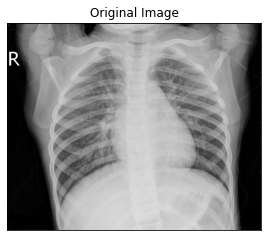

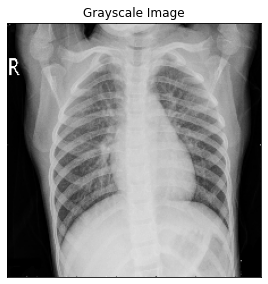

In [16]:
display_image(training_data,grayscale_training_data,'Original Image',"Grayscale Image")

## **Step 3.5: Pre-process Testing Data**
### **Step 3.5.1 Resize X-ray Images in Testing Data**


In [17]:
resized_testing_data = resize('/content/drive/MyDrive/Binary Class Pneumonia Classification/Sample Data/Testing_Data',image_width,image_height)

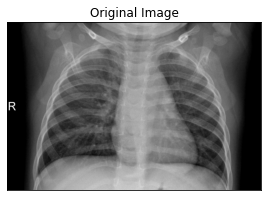

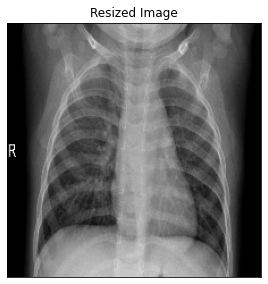

In [18]:
display_image(testing_data,resized_testing_data,'Original Image',"Resized Image")

###	**Step 3.5.2: Convert Resized X-ray Images in Training Data into Grayscale**

In [19]:
grayscale_testing_data = to_grayscale('/content/drive/MyDrive/Binary Class Pneumonia Classification/Sample Data/Testing_Data')

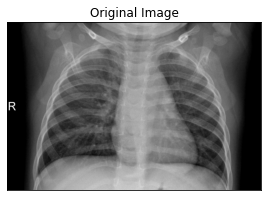

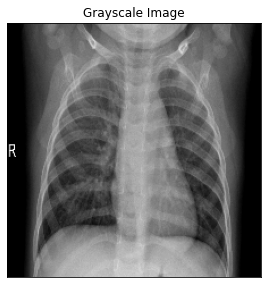

In [20]:
display_image(testing_data,grayscale_testing_data,'Original Image',"Grayscale Image")

## **Step 3.6: Pre-process Validation Data**
### **Step 3.6.1 Resize X-ray Images in validation Data**


In [21]:
resized_validation_data = resize('/content/drive/MyDrive/Binary Class Pneumonia Classification/Sample Data/Validation_Data',image_width,image_height)

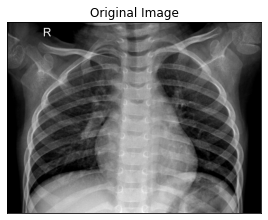

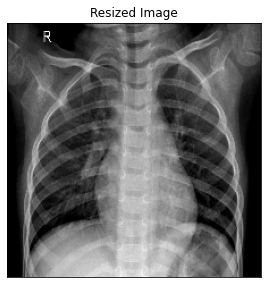

In [22]:
display_image(validation_data,resized_validation_data,'Original Image',"Resized Image")

###	**Step 3.5.2: Convert Resized X-ray Images in Training Data into Grayscale**

In [23]:
grayscale_validation_data = to_grayscale('/content/drive/MyDrive/Binary Class Pneumonia Classification/Sample Data/Validation_Data')

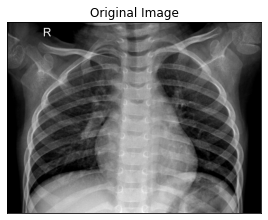

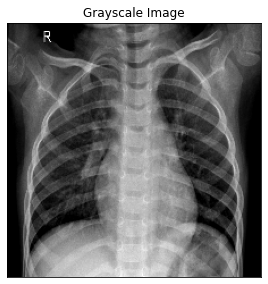

In [24]:
display_image(validation_data,grayscale_validation_data,'Original Image',"Grayscale Image")

# **Step 4: Represent Training Data, Testing Data and Validation Data in Machine Understandable Format**

## **Step 4.1: Represent Training Data Into Machine Understandable Format**

### **Step 4.1.1: Convert Resized Grayscale X-ray Images in Training Data into Numpy Array**


In [47]:
def display(image,title):
  
  plt.figure(figsize=(5,5))
  plt.imshow(image[0][0], cmap='gray')
  plt.title(title)

Grayscale X-ray Image of Training Data
Grayscale X-ray Image of Training Data into Numpy Array Form
[[141   3   3 ...  17   5   0]
 [  1   1 124 ...  15   4   0]
 [222   3   2 ...  15   1   0]
 ...
 [  3   3   3 ...   0   0   3]
 [  3   3   3 ...   0   1   3]
 [  9   3   3 ...   0   2   3]]


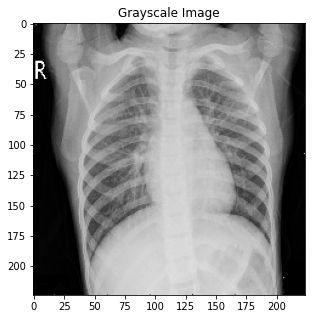

In [35]:
training_data_array = np.asarray(grayscale_training_data)
print("Grayscale X-ray Image of Training Data")
print("=======================================")
display(grayscale_training_data,"Grayscale Image")
print("Grayscale X-ray Image of Training Data into Numpy Array Form")
print("==============================================================")
print(training_data_array[0][0])

### **Step 4.1.2: Nomalize Numpy Array of Grayscale X-ray Images in Training Data**


In [39]:
''' 
    /*---------------------------------------------------SPLIT ---------------------------------------
    | Function  : split()
    | Purpose   : Split Training, Testing, Validation Data Into Feature Vector and Labels:
    |       
    | Arguments : 
    |       image_array: Numpy array of Image 
    | Return    :
    |       input_feature_vector,output_labels: Splitted dataset into Feature Vector and Output Labels 
    *-------------------------------------------------------------------------------------------------*/
'''

def split(image_array):
  input_feature_vector = []
  output_labels = []

  for feature, label in image_array:
    input_feature_vector.append(feature)
    output_labels.append(label)
  return input_feature_vector,output_labels


In [41]:
''' 
    /*----------------------------------------- DATA_NORMALIZATION -----------------------------------
    | Function  : data_normalization()
    | Purpose   : perform a grayscale normalization to reduce the effect of illumination's differences:
    |       
    | Arguments : 
    |       feature: Feature Vector to be Normalize
    | Return    :
    |       feature: Normalized Feature Vector 
    *---------------------------------------------------------------------------------------------------*/
'''

def data_normalization(input_feature_vector):
  # Normalize the data
  input_feature_vector = np.array(input_feature_vector)
  input_feature_vector = input_feature_vector.astype('float32') 
  input_feature_vector= input_feature_vector/ 255
  return input_feature_vector


In [40]:
print("Data Trainnig Data in Numpy Array into Input Feature Vector and Output Labels")
print("=============================================================================")
input_training_data,output_training_label = split(training_data_array)
print("Training Data After Split")
print("=========================")
print("\nFeature Vector of Trainig Data")
print("================================")
print(input_training_data)

print("\nOutput Labels of Training Data")
print("================================\n")
print (output_training_label)

Data Trainnig Data in Numpy Array into Input Feature Vector and Output Labels
Training Data After Split

Feature Vector of Trainig Data
[array([[141,   3,   3, ...,  17,   5,   0],
       [  1,   1, 124, ...,  15,   4,   0],
       [222,   3,   2, ...,  15,   1,   0],
       ...,
       [  3,   3,   3, ...,   0,   0,   3],
       [  3,   3,   3, ...,   0,   1,   3],
       [  9,   3,   3, ...,   0,   2,   3]], dtype=uint8), array([[ 74,   1, 161, ...,  71,  75,  79],
       [  3,   0,   1, ...,  74,  68,  98],
       [ 33,   3,   0, ...,  76,  83, 114],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0]], dtype=uint8), array([[65, 76, 78, ..., 60, 60, 55],
       [64, 71, 76, ..., 59, 57, 54],
       [64, 73, 76, ..., 59, 53, 50],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), array([[ 94,  94,  90, ...

In [45]:
print("Normalization of Feature Vecotrs of Training Data")
print("==================================================\n")

normalized_training_data = data_normalization(input_training_data)
print(normalized_training_data)

Normalization of Feature Vecotrs of Training Data

[[[0.5529412  0.01176471 0.01176471 ... 0.06666667 0.01960784 0.        ]
  [0.00392157 0.00392157 0.4862745  ... 0.05882353 0.01568628 0.        ]
  [0.87058824 0.01176471 0.00784314 ... 0.05882353 0.00392157 0.        ]
  ...
  [0.01176471 0.01176471 0.01176471 ... 0.         0.         0.01176471]
  [0.01176471 0.01176471 0.01176471 ... 0.         0.00392157 0.01176471]
  [0.03529412 0.01176471 0.01176471 ... 0.         0.00784314 0.01176471]]

 [[0.2901961  0.00392157 0.6313726  ... 0.2784314  0.29411766 0.30980393]
  [0.01176471 0.         0.00392157 ... 0.2901961  0.26666668 0.38431373]
  [0.12941177 0.01176471 0.         ... 0.29803923 0.3254902  0.44705883]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.00784314 0.         0.         ... 0.         0.         0.        ]
  [0.00784314 0.         0.         ... 0.         0.         0.        ]]

 [[0.25490198 0.29803923 0.30588236 ... 0.235

## **Step 4.2: Represent Testing Data Into Machine Understandable Format**

### **Step 4.2.1: Convert Resized Grayscale X-ray Images in Testing Data into Numpy Array**


Grayscale X-ray Image of testing Data
Grayscale X-ray Image of testing Data into Numpy Array Form
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


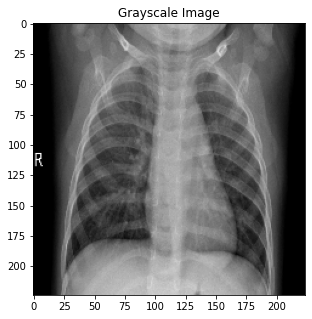

In [50]:
testing_data_array = np.asarray(grayscale_testing_data)
print("Grayscale X-ray Image of testing Data")
print("=======================================")
display(grayscale_testing_data,"Grayscale Image")
print("Grayscale X-ray Image of testing Data into Numpy Array Form")
print("===========================================================")
print(testing_data_array[0][0])

### **Step 4.2.2: Nomalize Numpy Array of Grayscale X-ray Images in Testing Data**


In [51]:
print("Testing Data in Numpy Array into Input Feature Vector and Output Labels")
print("=======================================================================")
input_testing_data,output_testing_label = split(testing_data_array)
print("Testing Data After Split")
print("=========================")
print("\nFeature Vector of Testing Data")
print("================================")
print(input_testing_data)

print("\nOutput Labels of Testing Data")
print("================================\n")
print (output_testing_label)

Testing Data in Numpy Array into Input Feature Vector and Output Labels
Testing Data After Split

Feature Vector of Testing Data
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 0,  0,  0, ..., 44, 35, 17],
       [ 0,  0,  0, ..., 44, 32, 23],
       [ 0,  0,  0, ..., 45, 32, 14],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), array([[ 86,  97, 101, ...,  43,  29,   3],
       [ 90,  96, 100, ...,  44,  27,   2],
       [ 92, 101, 102, ...,  43,  24,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..

In [52]:
print("Normalization of Feature Vecotrs of Testing Data")
print("================================================\n")

normalized_testing_data = data_normalization(input_testing_data)
print(normalized_testing_data)

Normalization of Feature Vecotrs of Testing Data

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.17254902 0.13725491 0.06666667]
  [0.         0.         0.         ... 0.17254902 0.1254902  0.09019608]
  [0.         0.         0.         ... 0.1764706  0.1254902  0.05490196]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.3372549  0.38039216 0.39607844 ... 0.1686

## **Step 4.3: Represent Validation Data Into Machine Understandable Format**

### **Step 4.3.1: Convert Resized Grayscale X-ray Images in Validation Data into Numpy Array**


Grayscale X-ray Image of Validation Data
Grayscale X-ray Image of Validation Data into Numpy Array Form
[[ 8 14 24 ... 64 60 61]
 [11 14 32 ... 69 68 65]
 [11 11 33 ... 70 69 57]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


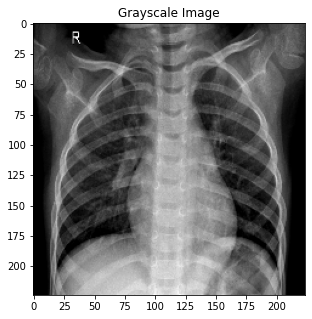

In [53]:
validation_data_array = np.asarray(grayscale_validation_data)
print("Grayscale X-ray Image of Validation Data")
print("=========================================")
display(grayscale_validation_data,"Grayscale Image")
print("Grayscale X-ray Image of Validation Data into Numpy Array Form")
print("==============================================================")
print(validation_data_array[0][0])

### **Step 4.3.2: Nomalize Numpy Array of Grayscale X-ray Images in Validation Data**


In [54]:
print("Validation Data in Numpy Array into Input Feature Vector and Output Labels")
print("==========================================================================")
input_validation_data,output_validation_label = split(validation_data_array)
print("Validation Data After Split")
print("===========================")
print("\nFeature Vector of Validation Data")
print("===================================")
print(input_validation_data)

print("\nOutput Labels of Validation Data")
print("==================================\n")
print (output_validation_label)

Validation Data in Numpy Array into Input Feature Vector and Output Labels
Validation Data After Split

Feature Vector of Validation Data
[array([[ 8, 14, 24, ..., 64, 60, 61],
       [11, 14, 32, ..., 69, 68, 65],
       [11, 11, 33, ..., 70, 69, 57],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 77,   1,  89, ...,  15,  16,  15],
       [  1,   2,   1, ...,  15,  15,  16],
       [152,   1,   1, ...,  14,  15,  15],
       ...,
       [ 34,  38,  33, ...,  30,  29,  18],
       [ 51,  33,  36, ...,  31,  28,  30],
       [ 67,  33,  32, ...,  29,  27,  28]], dtype=uint8), array([[149,   4, 183, ..., 173,   2,   2],
       [  0,   1,   0, ...,   7,   2,   0],
       [

In [55]:
print("Normalization of Feature Vecotrs of Validation Data")
print("===================================================\n")

normalized_validation_data = data_normalization(input_validation_data)
print(normalized_validation_data)

Normalization of Feature Vecotrs of Validation Data

[[[0.03137255 0.05490196 0.09411765 ... 0.2509804  0.23529412 0.23921569]
  [0.04313726 0.05490196 0.1254902  ... 0.27058825 0.26666668 0.25490198]
  [0.04313726 0.04313726 0.12941177 ... 0.27450982 0.27058825 0.22352941]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.00784314 0.01176471 0.01176471 ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.3019608  0.00392157 0.34901962 ... 0.0

In [57]:
# resize data for deep learning
image_width = 224 
image_height = 224
input_training_data = normalized_training_data.reshape(-1, image_width, image_height, 1)
output_training_label = np.array(output_training_label)

input_testing_data = normalized_testing_data.reshape(-1, image_width, image_height, 1)
output_testing_label = np.array(output_testing_label)

input_validation_data = normalized_validation_data.reshape(-1, image_width, image_height, 1)
output_validation_label = np.array(output_validation_label)


# **Step 05: Execute the Training Phase**

## **Step 5.1:Create CNN Model Architecture**


In [66]:
''' 
    /*----------------------------- CREATE CNN MODEL -------------
    | Function  : create_model()
    | Purpose   : To Create CNN Model Architecture using Keras Library
    |       
    | Arguments : 
    |       input_dimension: Dimension of Input Images
    |       hidden_layer_activation: activation of hidden layer (relu/tanh/sigmoid)
    |       output_layer_activation: activation of output layer (sigmoid/softmax)
    |       output_unit: Number of unit in output layer
    | Return    :
    |       model: built CNN model 
    *----------------------------------------------------------------*/
'''

def create_model(input_dimension,hidden_layer_activation,output_layer_activation,output_unit):
  model = Sequential()
  model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = hidden_layer_activation , input_shape = input_dimension))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = hidden_layer_activation))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = hidden_layer_activation))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = hidden_layer_activation))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = hidden_layer_activation))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Flatten())
  model.add(Dense(units = 128 , activation = hidden_layer_activation))
  model.add(Dropout(0.2))
  model.add(Dense(output_unit , activation = output_layer_activation))

  return model


## **Step 5.2: Hyperparameters Settings**

In [67]:
'''
/*---------------- INITIALIZE_PARAMETERS ------------------
'''
input_dimension            = (image_width,image_height,1)
hidden_layer_activation    = 'relu'
output_layer_activation    = 'sigmoid'
output_unit                = 1
number_of_epochs           = 15
learning_rate              = 1e-4


## **Step 5.3: Create Model Object**

In [68]:
model = create_model(input_dimension,hidden_layer_activation,output_layer_activation,output_unit)

## **Step 5.4: Initialize Optimizer and Loss Function**

In [69]:
model.compile(optimizer = Adam(lr=learning_rate) , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 32)      320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 64)       

## **Step 5.5: Evaluation Measure**

In [70]:
''' 
    /*----------------------------- CALCULATE_ACCURACY -------------
    | Function  : calculate_accuracy()
    | Purpose   : Calculate accuracy score
    | Arguments : 
    |       X_test : Feature vector of test Data
    |       Y_test : Actual Output Labels
    | Return    :
    |       accuracy   : Accuracy score
    *------------------------------------------------------------*/
'''

def calculate_accuracy(X_test, Y_test):

  pred=model.predict(X_test)
  y_pred=np.argmax(pred,axis=1)

  loss, accuracy = model.evaluate(X_test, Y_test, verbose = 0)
  return accuracy
  

## **Step 5.6: Calculate Epoch Elapsed Time**

In [71]:
''' 
    /*----------------------------- EPOCH_TIME_CALCULATION -------------
    | Function  : epoch_time()
    | Purpose   : Calculate time elapsed in each epoch
    | Arguments : 
    |        start_time   : Time when an epoch's execution starts
    |        end_time     : Time when an epoch's execution end
    | Return    :
    |        elapsed_mins : Time consumed by one epoch in minutes
    |        elapsed_secs : Time consumed by one epoch in seconds
    *---------------------------------------------------------*/
'''
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time                   # Time elapsed by one epoch 
    elapsed_mins = int(elapsed_time / 60)                  # Convert time in minutes
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60)) # Convert time in seconds
    return elapsed_mins, elapsed_secs

## **Step 5.7: Train Model** 

In [72]:
history = model.fit(input_training_data,output_training_label,epochs=number_of_epochs,validation_data=(input_validation_data,output_validation_label),verbose=1)

Epoch 1/15
3/3 [==============================] - 6s 2s/step - loss: 1.5192 - accuracy: 0.5417 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/15
3/3 [==============================] - 6s 2s/step - loss: 0.3624 - accuracy: 0.8472 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 3/15
3/3 [==============================] - 6s 2s/step - loss: 0.1709 - accuracy: 0.9167 - val_loss: 0.7080 - val_accuracy: 0.5000
Epoch 4/15
3/3 [==============================] - 6s 2s/step - loss: 0.2242 - accuracy: 0.9028 - val_loss: 0.7283 - val_accuracy: 0.5000
Epoch 5/15
3/3 [==============================] - 6s 2s/step - loss: 0.0726 - accuracy: 0.9583 - val_loss: 0.7517 - val_accuracy: 0.5000
Epoch 6/15
3/3 [==============================] - 6s 2s/step - loss: 0.0945 - accuracy: 0.9444 - val_loss: 0.7843 - val_accuracy: 0.5000
Epoch 7/15
3/3 [==============================] - 6s 2s/step - loss: 0.0467 - accuracy: 0.9722 - val_loss: 0.8337 - val_accuracy: 0.5000
Epoch 8/15
3/3 [=========================

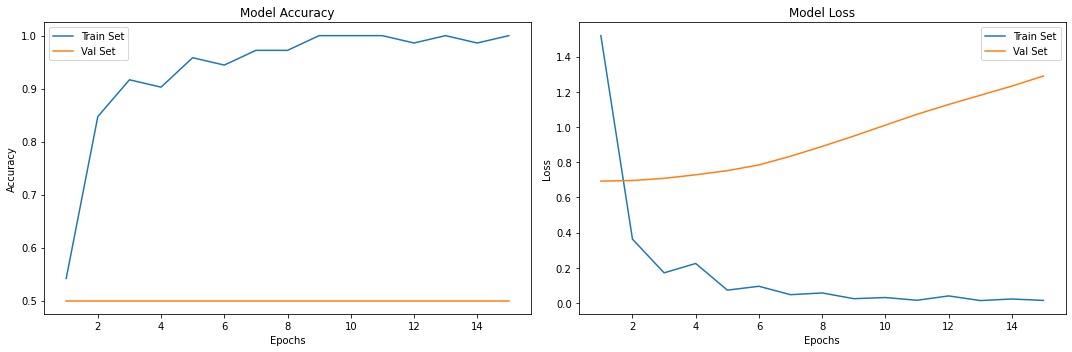

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

### **Step 5.8: Save Model**

In [74]:
''' 
    /*----------------------------- SAVE_MODEL -------------
    | Function  : save_model()
    | Purpose   : Save a trained model on your hard disk
    | Arguments : 
    |        drive_path: Path to the directory where the trained model will be saved
    |        model: model to be saved
    | Return    :
    |        Trained model will be saved on hard disk
    *---------------------------------------------------------*/

'''
def save_model(drive_path,model):
  model.save(drive_path+'/Pneumonia Disease Prediction model.h5')

In [77]:
save_model('/content/drive/MyDrive/Binary Class Pneumonia Classification/Trained Model',model)

# **Step 06: Execute the Testing Phase**

## **Step 6.1: Load Saved Model (Saved in Step 5.8)**

In [78]:
''' 
    /*---------------------------------- LOAD_MODEL -----------------------------------
    | Function  : load()
    | Purpose   : Load Saved Model from the Hard disk
    | Arguments : 
    |        drive_path: Path to the directory where the trained model have been saved
    |     
    | Return    :
    |        Trained model will be loaded from the hard disk
    *---------------------------------------------------------------------------------*/

'''
def load(drive_path):
  model=load_model(drive_path+'/Pneumonia Disease Prediction model.h5')
  return model
  

In [79]:
model = load('/content/drive/MyDrive/Binary Class Pneumonia Classification/Trained Model')

## **Step 6.2: Make Predictions on Testing Data**

In [83]:
print("Model Predictions on Test Data")
print("==============================\n")

predictions=model.predict(input_testing_data)
predicted_output=np.argmax(predictions,axis=1)
print(predicted_output)


Model Predictions on Test Data

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## **Step 6.3: Evaluate Performance of Trained Model on Test Data**

### **Step 6.3.1: Calculate Accuracy**

In [81]:
accuracy = calculate_accuracy(input_testing_data,output_testing_label)
print("\nEvaluation on Test data= ", accuracy * 100)



Evaluation on Test data=  50.0


### **Step 6.3.2: Draw Confusion Matrix**



In [82]:
"""
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

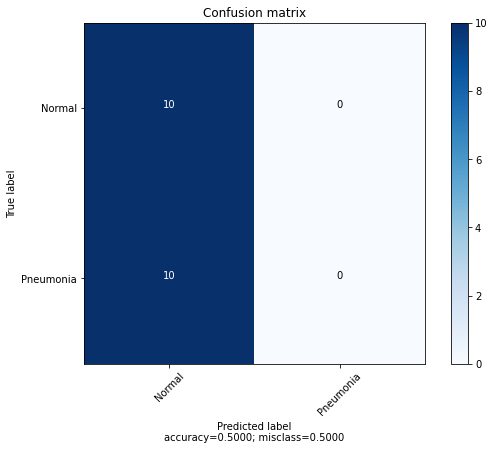

In [84]:
confusion_mtx = confusion_matrix(output_testing_label, predicted_output)
cm_plot_labels = ['Normal','Pneumonia']
cm = plot_confusion_matrix(confusion_mtx, target_names = cm_plot_labels, normalize=False)

### **Step 6.3.3: Print Classification Report**

In [86]:
print(classification_report(output_testing_label,predicted_output))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Step 7: Execute the Application Phase**

## **Step 7.1: Take Input (X-ray Image) from User**

In [104]:
file_path = '/content/drive/MyDrive/Binary Class Pneumonia Classification/Data for Application Phase/pneumonia.jpeg'
input_image = cv2.imread(file_path)


## **Step 7.2: Convert User Input (X-ray Image) into Feature Vector (Exactly Same as Feature Vectors of Training Data, Testing Data and Validation Data)**

In [105]:
image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
image = cv2.resize(image, (image_width, image_height))

image = np.array(image)
image = image.astype('float32') 
image= image/ 255
image = image.reshape(-1, image_width, image_height, 1)

## **Step 7.3: Make Prediction on Unseen Data**

### **Step 7.3.1: Load Saved Model**

In [106]:
model = load('/content/drive/MyDrive/Binary Class Pneumonia Classification/Trained Model')

### **Step 7.3.2: Apply Model on Feature Vector of Unseen Data**

In [107]:
image = np.expand_dims(image, axis=-1)
prediction = (model.predict(image) > 0.5).astype("int32")


### **Step 7.3.3: Return Prediction to the User**

 

Trained Model Prediction
 + ============================== +
 |                                |
           Class : Pneumonia       
 |                                |
 + ============================== +


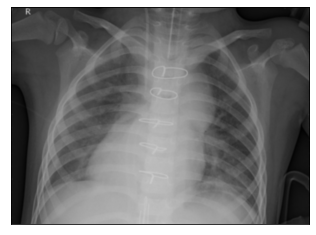

In [108]:
if prediction == 0:
  print('\033[1m',"\n\nTrained Model Prediction")
  print('\033[1m',"+","="*30,"+")
  print('\033[1m',"|"," "*30,"|\n           Class : Normal       \n","|                                |")
  print('\033[1m',"+","="*30,"+")
  plt.imshow(input_image, cmap = 'gray', interpolation = 'bicubic')
  plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
  plt.show()
  
else:
  print('\033[1m',"\n\nTrained Model Prediction")
  print('\033[1m',"+","="*30,"+")
  print('\033[1m',"|"," "*30,"|\n           Class : Pneumonia       \n","|                                |")
  print('\033[1m',"+","="*30,"+")
  plt.imshow(input_image, cmap = 'gray', interpolation = 'bicubic')
  plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
  plt.show()

# **Step 8: Execute the Feedback Phase**

A Two Step Process
*   Step 1: After sometime , take Feedback from 
  * Domain Experts and Users on deployed Gender Prediction System
*   Step 2: Make a List of Possible Improvements based on Feedback received


# **Step 9: Improve Model based on Feedback**
* There is Always Room for Improvement 😊
* Based on Feedback form Domain Experts and Users
  * Improve your Model 
